In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import hvplot.pandas
import pandas as pd

In [2]:
# Load the data for Counties adoption rate analysis
df = pd.read_csv(
    Path("../../../../../data/processed_data/ev_main_dataset.csv"),
)

# Display the data
print("Shape:", df.shape)
df

Shape: (2011, 10)


year state               county  \
0     2010    CA       Alameda County   
1     2010    CA        Amador County   
2     2010    CA  Contra Costa County   
3     2010    CA        Fresno County   
4     2010    CA      Humboldt County   
...    ...   ...                  ...   
2006  2022    TX          Wood County   
2007  2022    TX        Yoakum County   
2008  2022    TX         Young County   
2009  2022    TX        Zapata County   
2010  2022    TX        Zavala County   

                                              zip_codes  population  \
0     [94501, 94502, 94536, 94537, 94538, 94539, 945...     1512986   
1     [95601, 95629, 95640, 95642, 95654, 95665, 956...       37886   
2     [94505, 94506, 94507, 94509, 94511, 94513, 945...     1052540   
3     [93210, 93234, 93242, 93602, 93605, 93606, 936...      932039   
4     [95501, 95502, 95503, 95511, 95514, 95518, 955...      135009   
...                                                 ...         ...   
2006  [75410, 75444, 75494, 75497, 75765, 75773, 75783]       46930   
2007                                     [79323, 79355]        7484   
2008                [76372, 76374, 76450, 76460, 76481]       18012   
2009                              [78067, 78076, 78564]       13838   
2010                              [78829, 78839, 78872]        9384   

      ev_registrations  cumulative_ev_stations  median_income  \
0                   20                       0          69384   
1                    1                       1          54758   
2                   10                       0          78385   
3                    2                       0          46430   
4                    2                       0          40089   
...                ...                     ...            ...   
2006               188                       0          61748   
2007                10                       1          80317   
2008                94                       0          65565   
2009                10                       0          35061   
2010                12                       0          49243   

      ev_adoption_rate  ev_growth_rate  
0             0.000013             NaN  
1             0.000026             NaN  
2             0.000010             NaN  
3             0.000002             NaN  
4             0.000015             NaN  
...                ...             ...  
2006          0.004006        3.101753  
2007          0.001336        9.105559  
2008          0.005219        5.688565  
2009          0.000723        0.671123  
2010          0.001279        5.056905  

[2011 rows x 10 columns]

In [3]:
# Inspect the columns of the data
for index, value in enumerate(df.columns):
    print(index, value)

0 year
1 state
2 county
3 zip_codes
4 population
5 ev_registrations
6 cumulative_ev_stations
7 median_income
8 ev_adoption_rate
9 ev_growth_rate


In [4]:
# Convert `ev_adoption_rate` and `ev_growth_rate` to percentages
df["ev_adoption_rate"] = df["ev_adoption_rate"] * 100
df["ev_growth_rate"] = df["ev_growth_rate"] * 100

# Display the data
print("Shape:", df.shape)
df

Shape: (2011, 10)


year state               county  \
0     2010    CA       Alameda County   
1     2010    CA        Amador County   
2     2010    CA  Contra Costa County   
3     2010    CA        Fresno County   
4     2010    CA      Humboldt County   
...    ...   ...                  ...   
2006  2022    TX          Wood County   
2007  2022    TX        Yoakum County   
2008  2022    TX         Young County   
2009  2022    TX        Zapata County   
2010  2022    TX        Zavala County   

                                              zip_codes  population  \
0     [94501, 94502, 94536, 94537, 94538, 94539, 945...     1512986   
1     [95601, 95629, 95640, 95642, 95654, 95665, 956...       37886   
2     [94505, 94506, 94507, 94509, 94511, 94513, 945...     1052540   
3     [93210, 93234, 93242, 93602, 93605, 93606, 936...      932039   
4     [95501, 95502, 95503, 95511, 95514, 95518, 955...      135009   
...                                                 ...         ...   
2006  [75410, 75444, 75494, 75497, 75765, 75773, 75783]       46930   
2007                                     [79323, 79355]        7484   
2008                [76372, 76374, 76450, 76460, 76481]       18012   
2009                              [78067, 78076, 78564]       13838   
2010                              [78829, 78839, 78872]        9384   

      ev_registrations  cumulative_ev_stations  median_income  \
0                   20                       0          69384   
1                    1                       1          54758   
2                   10                       0          78385   
3                    2                       0          46430   
4                    2                       0          40089   
...                ...                     ...            ...   
2006               188                       0          61748   
2007                10                       1          80317   
2008                94                       0          65565   
2009                10                       0          35061   
2010                12                       0          49243   

      ev_adoption_rate  ev_growth_rate  
0             0.001322             NaN  
1             0.002639             NaN  
2             0.000950             NaN  
3             0.000215             NaN  
4             0.001481             NaN  
...                ...             ...  
2006          0.400597      310.175344  
2007          0.133618      910.555852  
2008          0.521874      568.856477  
2009          0.072265       67.112299  
2010          0.127877      505.690537  

[2011 rows x 10 columns]

In [5]:
# Create a function to get the top 10 counties by EV adoption rate
def get_top_10_counties(df, year_column='year', rate_column='ev_adoption_rate', county_column='county'):
    # Determine the most recent year in the DataFrame
    most_recent_year = df[year_column].max()
    
    # Filter the DataFrame for the most recent year
    recent_year_df = df.loc[df[year_column] == most_recent_year]
    
    # Get the top 10 counties by EV adoption rate
    top_10_df = recent_year_df.nlargest(10, rate_column)
    
    # Return the list of top 10 counties
    return top_10_df[county_column].tolist()

In [6]:
# Create separate DataFrames for Texas, Florida, and California
tx_df = df[df["state"] == "TX"].sort_values(["year", "state", "county"]).reset_index(drop=True)
fl_df = df[df["state"] == "FL"].sort_values(["year", "state", "county"]).reset_index(drop=True)
ca_df = df[df["state"] == "CA"].sort_values(["year", "state", "county"]).reset_index(drop=True)

# Display the DataFrames
display(tx_df.head(2))
display(fl_df.head(2))
display(ca_df.head(2))

year state           county  \
0  2017    TX  Anderson County   
1  2017    TX   Andrews County   

                                           zip_codes  population  \
0  [75763, 75779, 75801, 75802, 75803, 75832, 758...       58175   
1                                            [79714]       17603   

   ev_registrations  cumulative_ev_stations  median_income  ev_adoption_rate  \
0                 1                       0          42313          0.001719   
1                 1                       0          70753          0.005681   

   ev_growth_rate  
0             NaN  
1             NaN

year state          county  \
0  2018    FL  Alachua County   
1  2018    FL    Baker County   

                                           zip_codes  population  \
0  [32601, 32602, 32603, 32604, 32605, 32606, 326...      268851   
1                       [32040, 32063, 32072, 32087]       28353   

   ev_registrations  cumulative_ev_stations  median_income  ev_adoption_rate  \
0               766                      12          49078          0.284916   
1                 5                       0          61769          0.017635   

   ev_growth_rate  
0             NaN  
1             NaN

year state          county  \
0  2010    CA  Alameda County   
1  2010    CA   Amador County   

                                           zip_codes  population  \
0  [94501, 94502, 94536, 94537, 94538, 94539, 945...     1512986   
1  [95601, 95629, 95640, 95642, 95654, 95665, 956...       37886   

   ev_registrations  cumulative_ev_stations  median_income  ev_adoption_rate  \
0                20                       0          69384          0.001322   
1                 1                       1          54758          0.002639   

   ev_growth_rate  
0             NaN  
1             NaN

In [7]:
# Create a list of the top 10 counties by EV adoption rate for Texas, Florida, and California
# SPECIFY which column to obtain the TOP 10 COUNTIES from
# Obtain from the `ev_adoption_rate` column
tx_top_10_list = get_top_10_counties(tx_df, rate_column='ev_adoption_rate')
fl_top_10_list = get_top_10_counties(fl_df, rate_column='ev_adoption_rate')
ca_top_10_list = get_top_10_counties(ca_df, rate_column='ev_adoption_rate')

print("TX:", tx_top_10_list)
print("FL:", fl_top_10_list)
print("CA:", ca_top_10_list)

TX: ['King County', 'Travis County', 'Williamson County', 'Collin County', 'Caldwell County', 'Denton County', 'Kendall County', 'Hays County', 'Comal County', 'Rockwall County']
FL: ['Collier County', 'Palm Beach County', 'St. Johns County', 'Sarasota County', 'Orange County', 'Broward County', 'Martin County', 'Miami-Dade County', 'Seminole County', 'Monroe County']
CA: ['Santa Clara County', 'Marin County', 'San Mateo County', 'Alameda County', 'Orange County', 'Contra Costa County', 'Sonoma County', 'Santa Cruz County', 'San Francisco County', 'Napa County']


In [8]:
# Create a seperate DataFrame for the top 10 counties in Texas, Florida, and California
tx_top_10_df = tx_df.copy()
fl_top_10_df = fl_df.copy()
ca_top_10_df = ca_df.copy()

In [9]:
# Filter the DataFrames to include only the top 10 counties from `ev_adoption_rate`
tx_top_10_df = tx_top_10_df[tx_top_10_df['county'].isin(tx_top_10_list)]
fl_top_10_df = fl_top_10_df[fl_top_10_df['county'].isin(fl_top_10_list)]
ca_top_10_df = ca_top_10_df[ca_top_10_df['county'].isin(ca_top_10_list)]

# Preview the top 10 counties DataFrames
display(tx_top_10_df.head(2))
display(fl_top_10_df.head(2))
display(ca_top_10_df.head(2))

year state           county  \
21  2017    TX  Caldwell County   
27  2017    TX    Collin County   

                                            zip_codes  population  \
21  [78616, 78622, 78644, 78648, 78655, 78656, 78661]       42328   
27  [75002, 75009, 75013, 75023, 75024, 75025, 750...      971864   

    ev_registrations  cumulative_ev_stations  median_income  ev_adoption_rate  \
21                34                       0          51346          0.080325   
27               424                      25          90124          0.043628   

    ev_growth_rate  
21             NaN  
27             NaN

year state          county  \
5   2018    FL  Broward County   
10  2018    FL  Collier County   

                                            zip_codes  population  \
5   [33004, 33008, 33009, 33019, 33020, 33021, 330...     1946107   
10  [34101, 34102, 34103, 34104, 34105, 34106, 341...      378201   

    ev_registrations  cumulative_ev_stations  median_income  ev_adoption_rate  \
5               7942                      70          57333          0.408097   
10              1692                      21          65675          0.447381   

    ev_growth_rate  
5              NaN  
10             NaN

year state               county  \
0  2010    CA       Alameda County   
2  2010    CA  Contra Costa County   

                                           zip_codes  population  \
0  [94501, 94502, 94536, 94537, 94538, 94539, 945...     1512986   
2  [94505, 94506, 94507, 94509, 94511, 94513, 945...     1052540   

   ev_registrations  cumulative_ev_stations  median_income  ev_adoption_rate  \
0                20                       0          69384          0.001322   
2                10                       0          78385          0.000950   

   ev_growth_rate  
0             NaN  
2             NaN

In [10]:
# Create a dictionary of styles to use with axes for titles, labels, and legends

# Set the style for the plot title
title_style = {
    "color": "#2c3e50",  
    "fontsize": 22,       
    "fontweight": "bold",
    "fontfamily": "DejaVu Sans", 
    "ha": "center", 
}

# Set the style for the x and y labels
axis_style = {
    "color": "#34495e",
    "fontsize": 18,
    "fontweight": "semibold",
    "fontfamily": "DejaVu Sans",
    "fontstyle": "italic",
}

# Set the style for legend
legend_style = {
    "fontsize": "small",
    "frameon": True,
    "facecolor": "#ecf0f1",
    "edgecolor": "#bdc3c7",
    "labelspacing": 1,
    "shadow": True,
}

In [11]:
# Create a custom line plot function to use with Seaborn
def custom_line_plot(df, ax, x, y, hue, title, x_label, y_label, leg_title, col=2):

    # Create the line plot with our parameters
    ax = sns.lineplot(
        data=df,
        x=x,
        y=y,
        hue=hue,
        marker="o",
        palette='deep'
    )

    # Set the title and labels using our styles
    ax.set_title(f'{title}', fontdict=title_style)
    ax.set_xlabel(f'{x_label}', fontdict=axis_style)
    ax.set_ylabel(f'{y_label}', fontdict=axis_style)

    # Adjust the legend to fit the plot
    ax.legend(title=f'{leg_title}', loc="best", ncol=col, **legend_style)

    return ax

In [12]:
# Create a custom bar plot function to use with Seaborn
def custom_bar_plot(df, ax, x, y, hue, title, xlabel, ylabel, rotation=0):
    
    # Plot the data using a barplot
    sns.barplot(
        data=df, 
        x=x, 
        y=y,
        hue=hue,
        ax=ax, 
        edgecolor='black',
        alpha=0.8
    )

    #  Set the cube helix color palette
    sns.cubehelix_palette(len(df[hue].unique()))

    # Set the title and labels using our styles
    ax.set_title(f'{title}', title_style)
    ax.set_xlabel(f'{xlabel}', axis_style)
    ax.set_ylabel(f'{ylabel}', axis_style)

    # Add grid and adjust layout
    ax.grid(True)

    return ax


# Texas Visualizations: : Adoption Rate

In [13]:
# Inspect for anomalies behavior in the data using interactive hvplot
# TEXAS: EV Adoption Rate Over Time by County

tx_df.hvplot.line(
    x='year',
    y='ev_adoption_rate',
    by='county',
    title='Texas EV Adoption Rate Over Time by County',
    xlabel='Year',
    ylabel='EV Adoption Rate (%)',
    legend='top',
    fontscale=1.2,
    width=750,
    height=500,
)

:NdOverlay   [county]
   :Curve   [year]   (ev_adoption_rate)

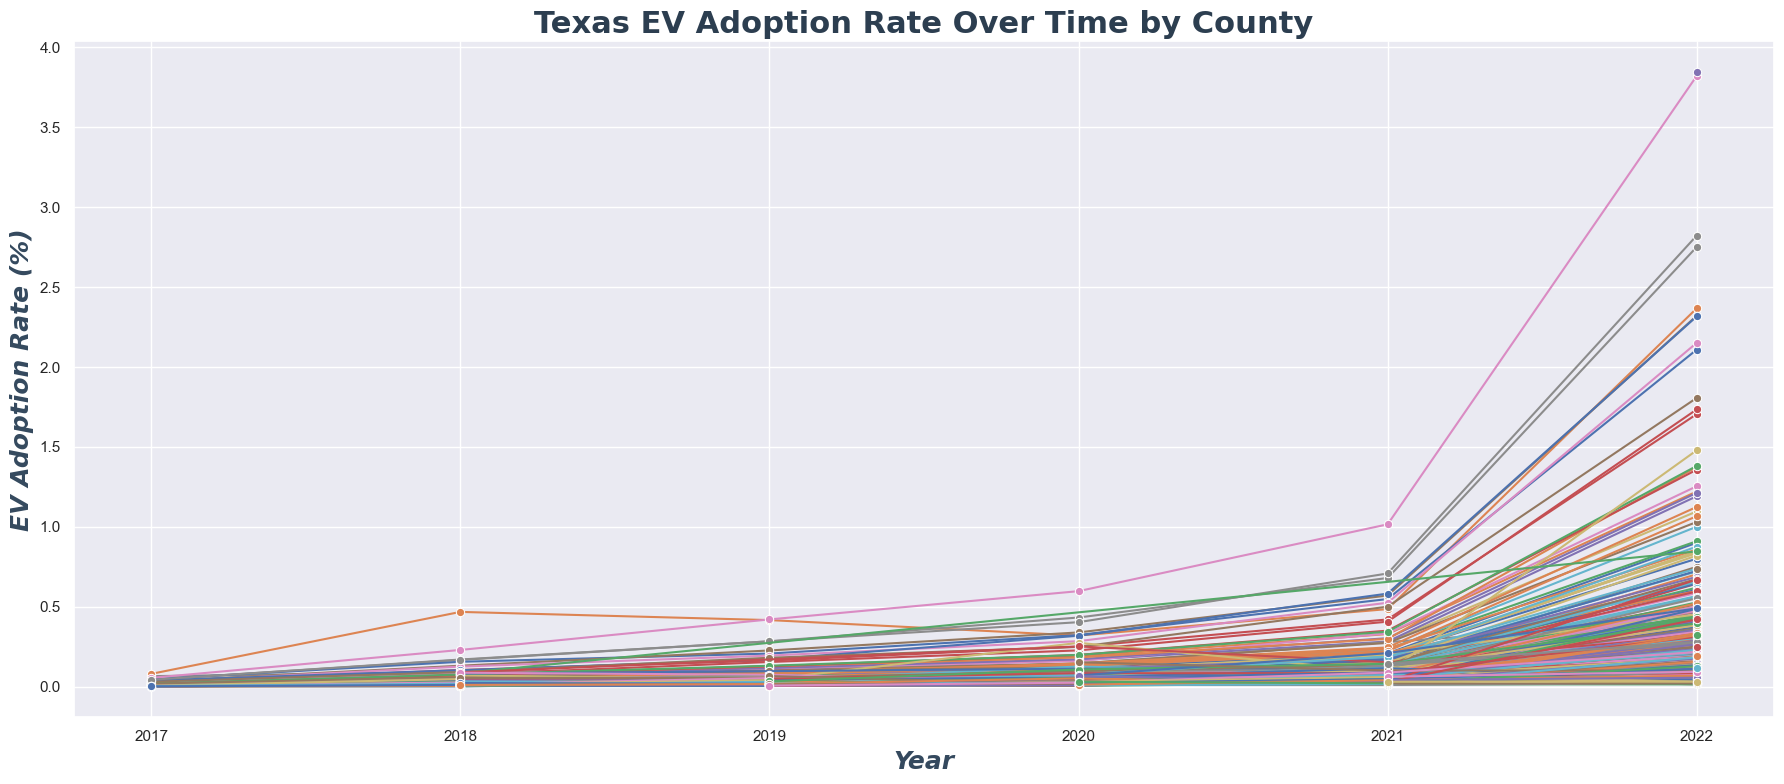

In [14]:
# Plot the EV vehicle adoption rate over time by county in Texas

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    tx_df,
    ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="county",
    title="Texas EV Adoption Rate Over Time by County",
    x_label="Year",
    y_label="EV Adoption Rate (%)",
    leg_title="County",
)

# Hide the legend
ax.legend().set_visible(False)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "tx_ev_adoption_rate_by_county.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

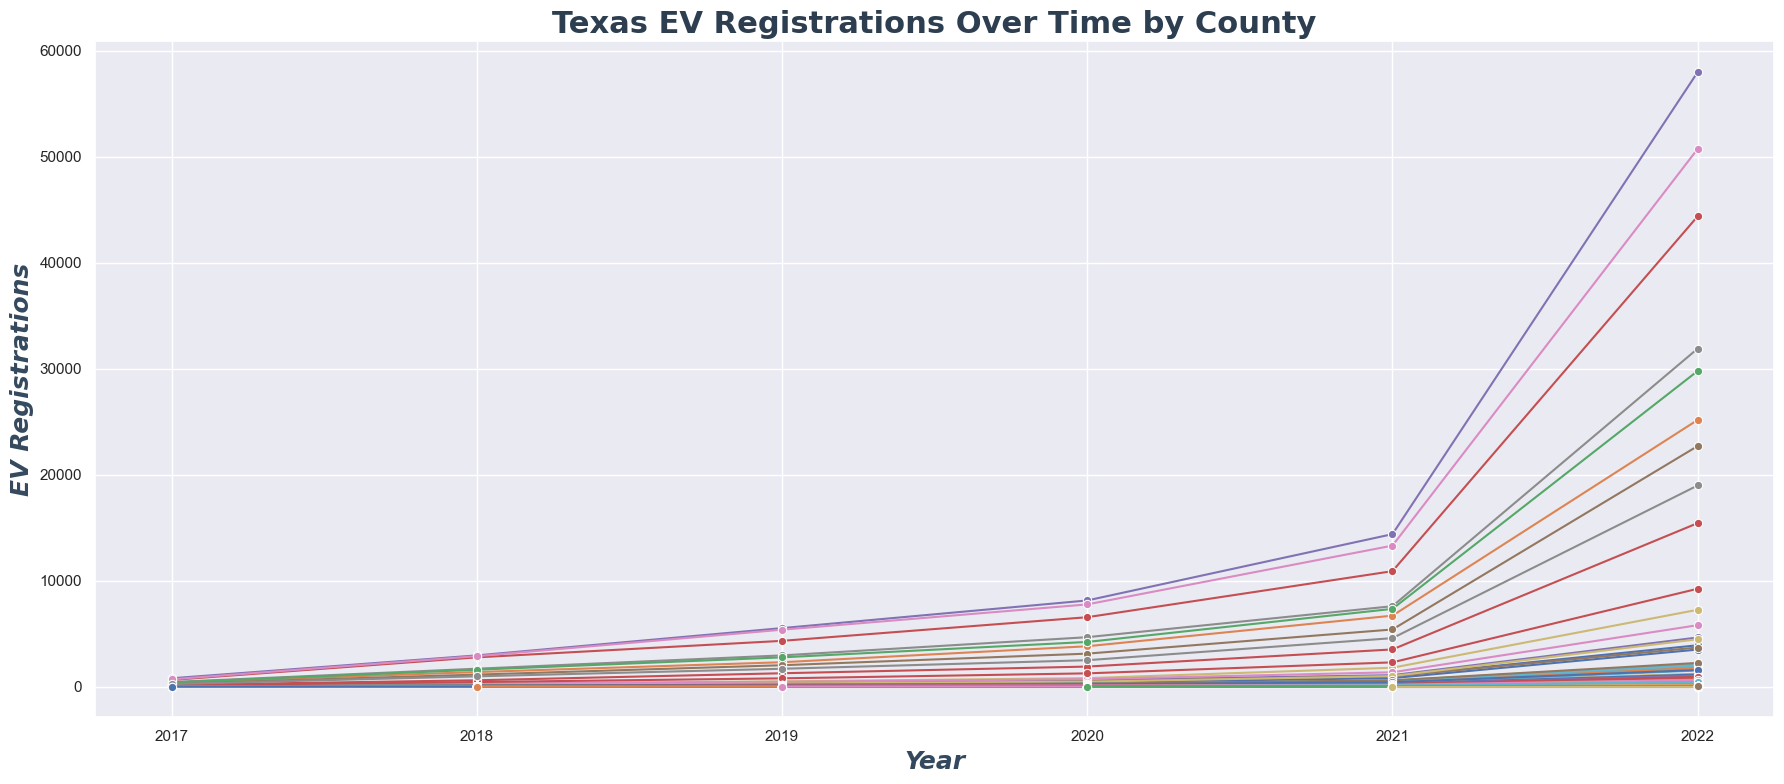

In [15]:
# Plot the EV vehicle registrations over time by county in Texas

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    tx_df,
    ax, 
    x="year", 
    y="ev_registrations", 
    hue="county",
    title="Texas EV Registrations Over Time by County",
    x_label="Year",
    y_label="EV Registrations",
    leg_title="County",
)

# Hide the legend
ax.legend().set_visible(False)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "tx_ev_registrations_by_county.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

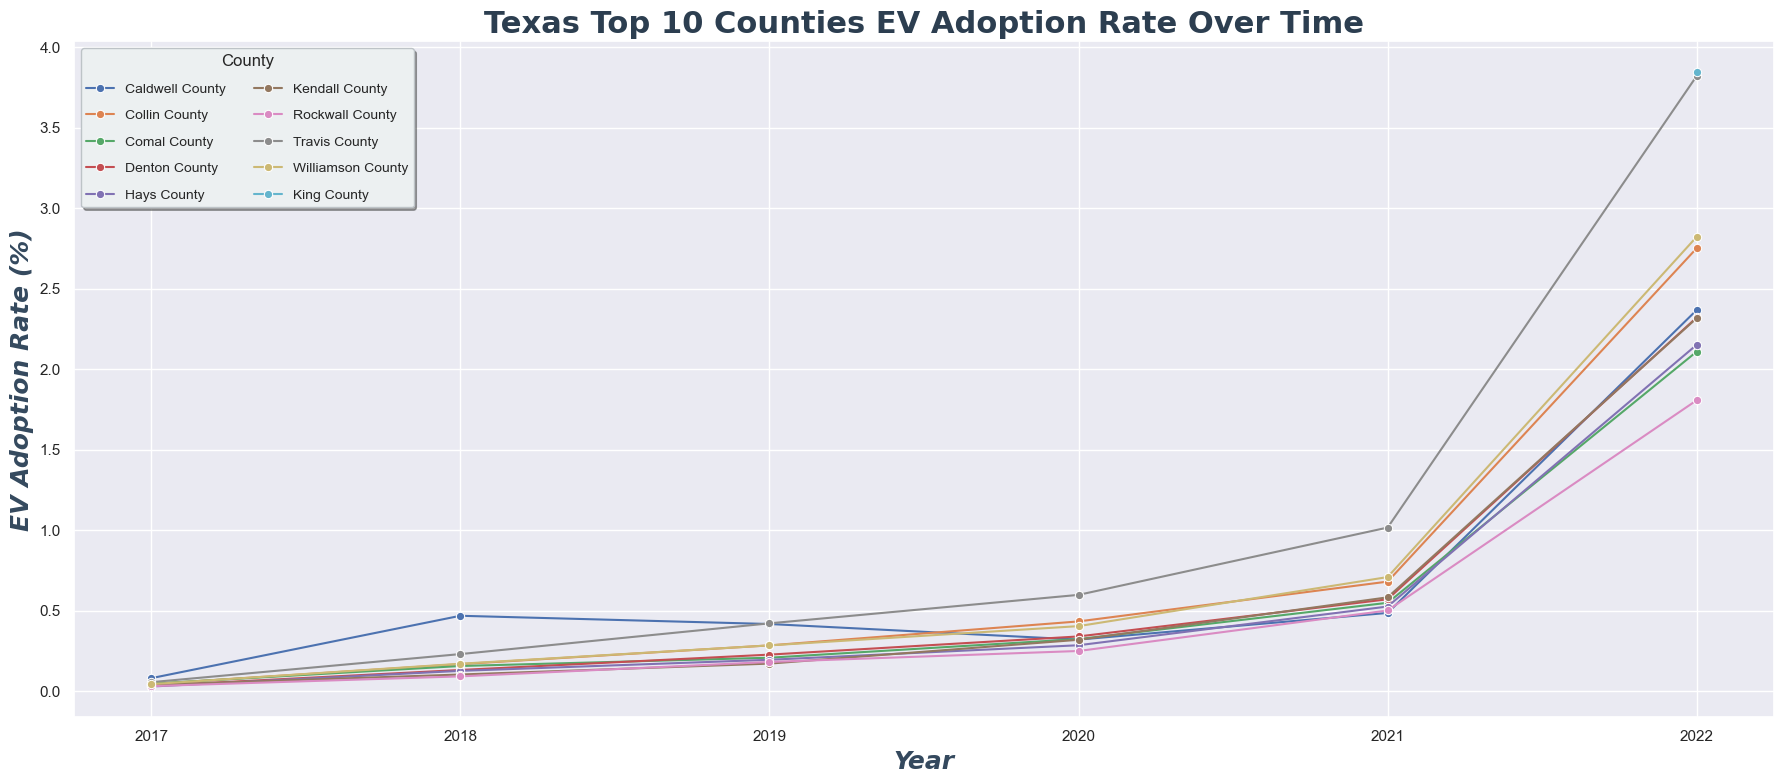

In [16]:
# Plot the EV vehicle adoption rate over time for the top 10 counties in Texas

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df=tx_top_10_df,
    ax=ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="county",
    title="Texas Top 10 Counties EV Adoption Rate Over Time",
    x_label="Year",
    y_label="EV Adoption Rate (%)",
    leg_title="County",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "tx_top_10_counties_ev_adoption_rate.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

In [17]:
# Filter the data for the year to plot for Texas
year_to_plot = 2022
year_df = tx_df[tx_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Inspect for anomalies behavior in the data using interactive hvplot
year_df.hvplot.bar(
    x='county',
    y='ev_adoption_rate',
    title = f'EV Adoption Rate by County in Texas for {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)',
    rot=45,
    width=1500,
    height=650,
)

:Bars   [county]   (ev_adoption_rate)

year state             county  \
1046  2022    TX        King County   
1130  2022    TX      Travis County   
1149  2022    TX  Williamson County   
963   2022    TX      Collin County   
949   2022    TX    Caldwell County   
980   2022    TX      Denton County   
1043  2022    TX     Kendall County   
1019  2022    TX        Hays County   
966   2022    TX       Comal County   
1105  2022    TX    Rockwall County   

                                              zip_codes  population  \
1046                                            [79236]         234   
1130  [73301, 73344, 78615, 78617, 78645, 78652, 786...     1327550   
1149  [76511, 76527, 76530, 76537, 76573, 76574, 765...      672273   
963   [75002, 75009, 75013, 75023, 75024, 75025, 750...     1158995   
949   [78616, 78622, 78644, 78648, 78655, 78656, 78661]       47849   
980   [75007, 75010, 75022, 75027, 75028, 75029, 750...      977760   
1043                [78004, 78006, 78013, 78027, 78074]       49019   
1019  [78610, 78619, 78620, 78640, 78666, 78667, 786...      269103   
966   [78070, 78130, 78131, 78132, 78133, 78135, 781...      184749   
1105                       [75032, 75087, 75132, 75189]      123342   

      ev_registrations  cumulative_ev_stations  median_income  \
1046                 9                       0          59375   
1130             50741                     550          92731   
1149             18978                      68         102851   
963              31894                     147         113255   
949               1133                       0          66779   
980              22698                      52         104180   
1043              1136                       0         104196   
1019              5791                      43          79990   
966               3897                       7          93744   
1105              2229                       8         121303   

      ev_adoption_rate  ev_growth_rate  
1046          3.846154             NaN  
1130          3.822154      276.170729  
1149          2.822960      298.437947  
963           2.751867      304.509921  
949           2.367866      387.489518  
980           2.321429      306.900086  
1043          2.317469      297.798178  
1019          2.151964      309.521172  
966           2.109348      284.466091  
1105          1.807170      260.852301

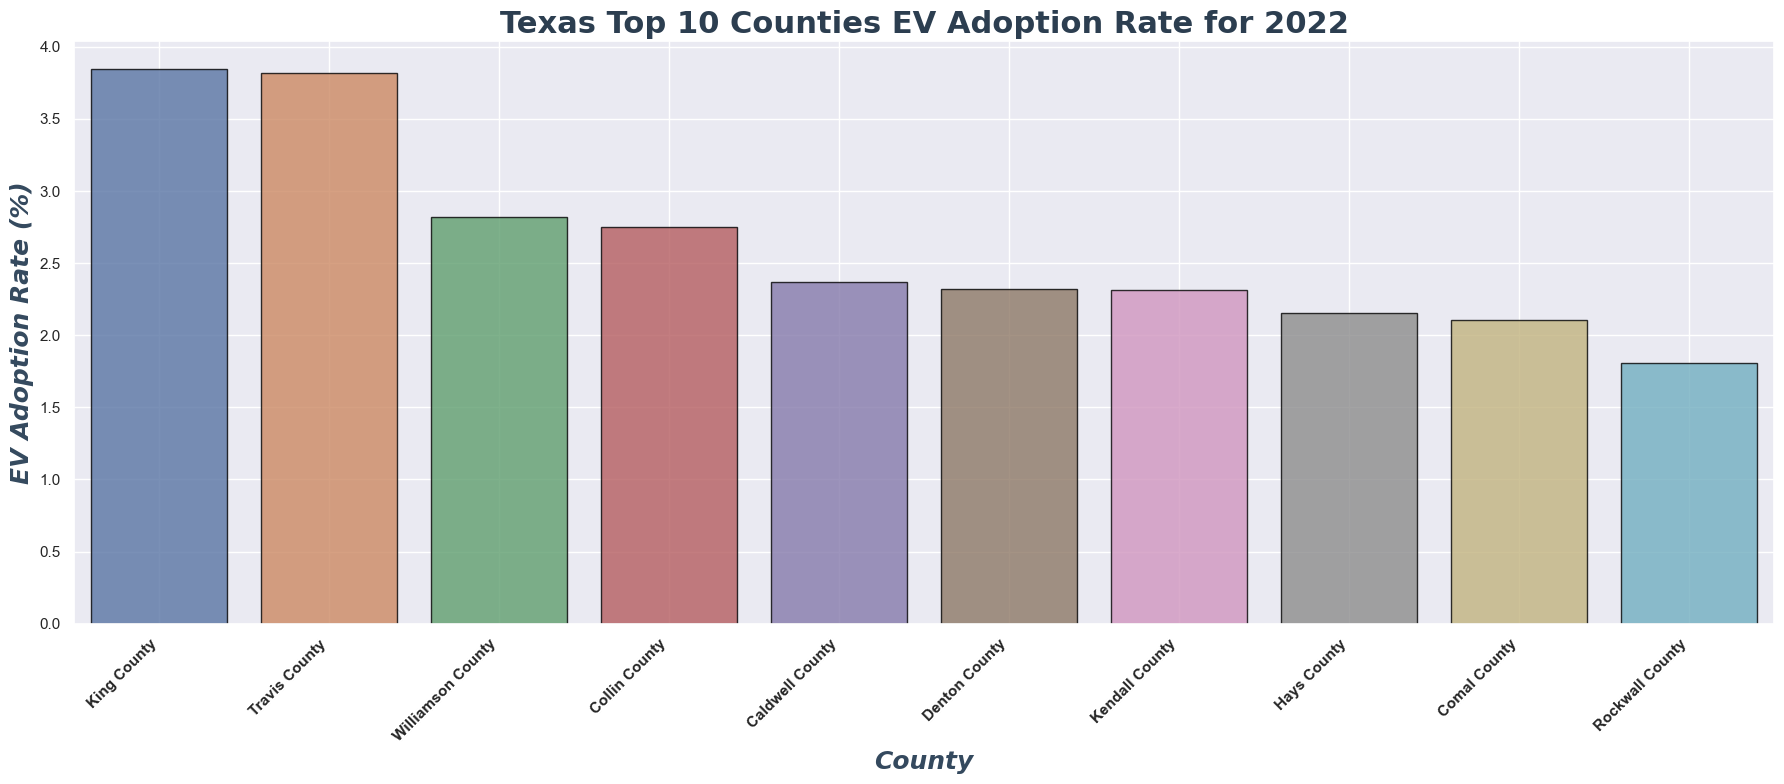

In [18]:
# Plot the EV vehicle adoption rate for a specific year for the top 10 counties in Texas

# Filter the data for the year to plot for Texas
year_to_plot = 2022
year_df = tx_top_10_df[tx_top_10_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df, 
    ax,
    x='county', 
    y='ev_adoption_rate', 
    hue='county',
    title=f'Texas Top 10 Counties EV Adoption Rate for {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

file_name = "tx_top_10_counties_2022.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

display(year_df.sort_values(by='ev_adoption_rate', ascending=False))

# Show the plot
plt.show()

# Florida Visualizations: Adoption Rate

In [19]:
# Inspection for anomalies behavior in the data using interactive hvplot
fl_df.hvplot.line(
    x='year',
    y='ev_adoption_rate',
    by='county',
    title='Florida EV Adoption Rate Over Time by County',
    xlabel='Year',
    ylabel='EV Adoption Rate (%)',
    legend='top',
    fontscale=1.2,
    width=750,
    height=500,
)


:NdOverlay   [county]
   :Curve   [year]   (ev_adoption_rate)

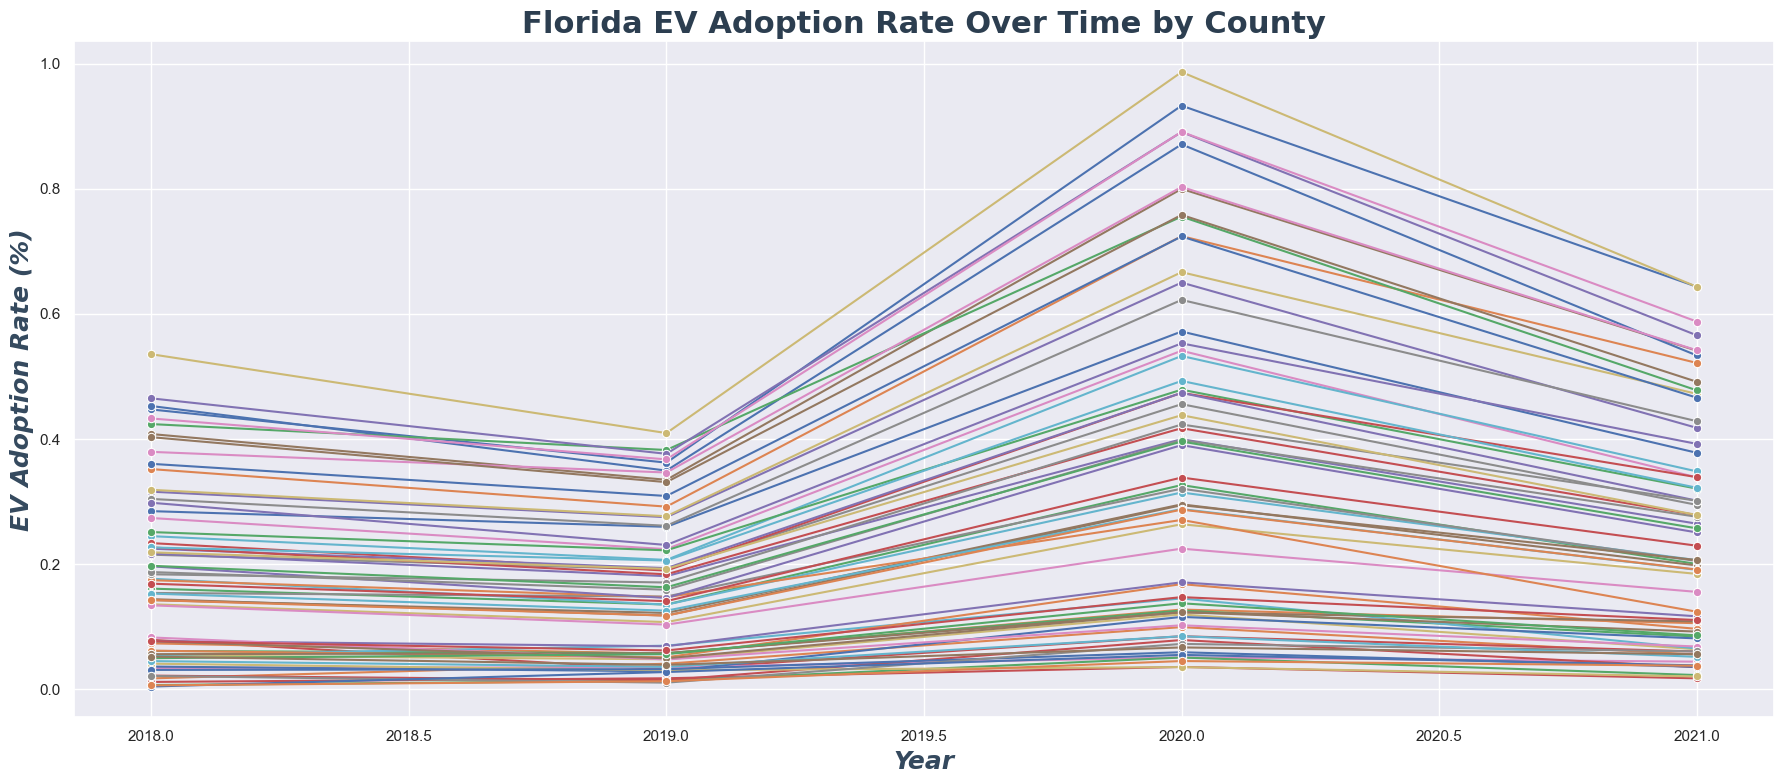

In [20]:
# Plot the EV vehicle adoption rate over time by county in Florida

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    fl_df,
    ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="county",
    title="Florida EV Adoption Rate Over Time by County",
    x_label="Year",
    y_label="EV Adoption Rate (%)",
    leg_title="County",
)

# Hide the legend
ax.legend().set_visible(False)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "fl_ev_adoption_rate_by_county.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

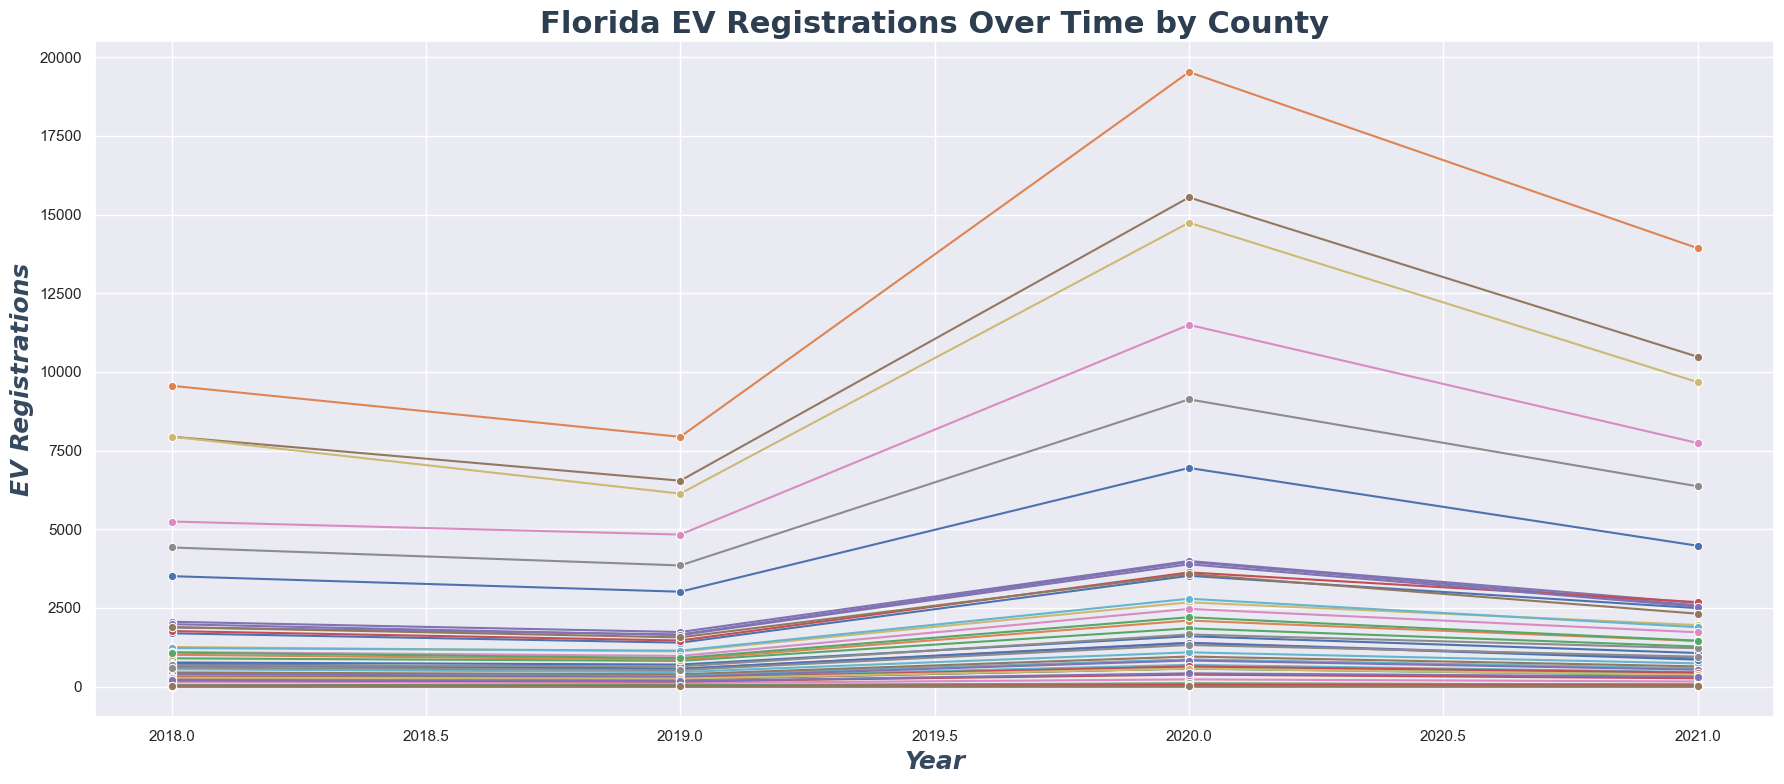

In [29]:
# Plot the EV vehicle registrations over time by county in Florida

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    fl_df,
    ax, 
    x="year", 
    y="ev_registrations", 
    hue="county",
    title="Florida EV Registrations Over Time by County",
    x_label="Year",
    y_label="EV Registrations",
    leg_title="County",
)

# Hide the legend
ax.legend().set_visible(False)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "fl_ev_registrations_by_county.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

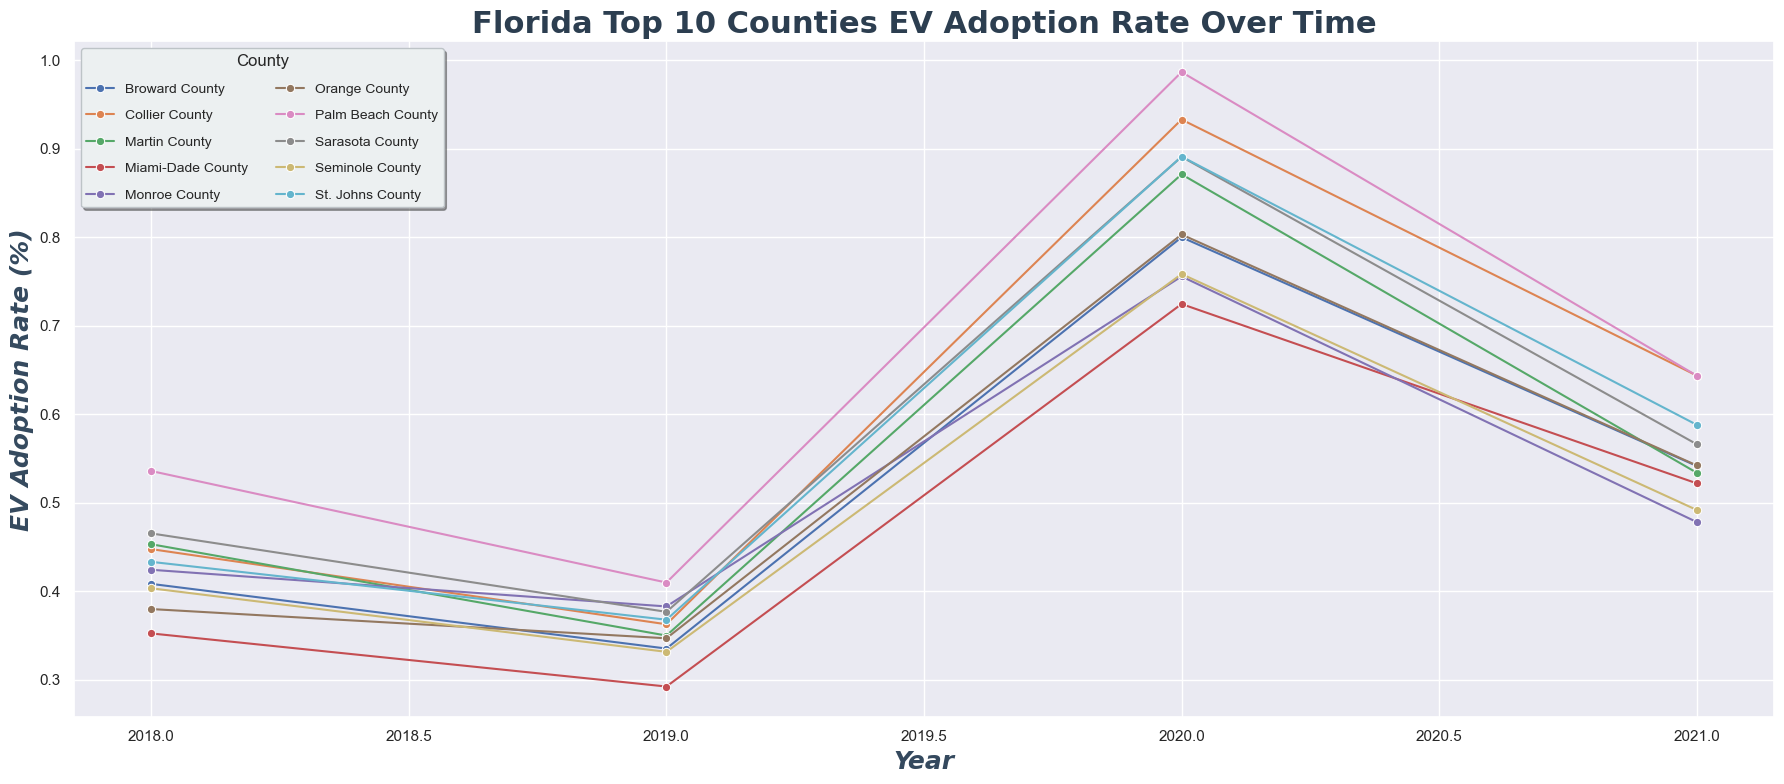

In [21]:
# Plot the EV vehicle adoption rate over time for the top 10 counties in Florida

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df=fl_top_10_df,
    ax=ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="county",
    title="Florida Top 10 Counties EV Adoption Rate Over Time",
    x_label="Year",
    y_label="EV Adoption Rate (%)",
    leg_title="County",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

file_name = "fl_top_10_counties_ev_adoption_rate.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

In [22]:
# Filter the data for the year to plot for Florida
year_to_plot = 2021
year_df = tx_df[tx_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Inspect for anomalies behavior in the data using interactive hvplot
year_df.hvplot.bar(
    x='county',
    y='ev_adoption_rate',
    title = f'EV Adoption Rate by County in Florida for {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)',
    rot=45,
    width=1500,
    height=650,
)

:Bars   [county]   (ev_adoption_rate)

year state             county  \
208  2021    FL     Collier County   
246  2021    FL  Palm Beach County   
254  2021    FL   St. Johns County   
252  2021    FL    Sarasota County   
244  2021    FL      Orange County   
203  2021    FL     Broward County   
238  2021    FL      Martin County   
239  2021    FL  Miami-Dade County   
253  2021    FL    Seminole County   
240  2021    FL      Monroe County   

                                             zip_codes  population  \
208  [34101, 34102, 34103, 34104, 34105, 34106, 341...      387226   
246  [33401, 33402, 33403, 33404, 33405, 33406, 334...     1503435   
254  [32004, 32033, 32080, 32081, 32082, 32084, 320...      293251   
252  [34223, 34228, 34229, 34230, 34231, 34232, 342...      448636   
244  [32703, 32704, 32709, 32710, 32712, 32733, 327...     1427761   
203  [33004, 33008, 33009, 33019, 33020, 33021, 330...     1935575   
238  [33455, 33475, 34956, 34957, 34958, 34990, 349...      160197   
239  [33002, 33010, 33011, 33012, 33013, 33014, 330...     2669748   
253  [32701, 32707, 32708, 32714, 32715, 32716, 327...      470857   
240  [33001, 33036, 33037, 33040, 33041, 33042, 330...       82220   

     ev_registrations  cumulative_ev_stations  median_income  \
208              2492                      34          75543   
246              9674                     170          68874   
254              1724                      22          88794   
252              2539                      73          69490   
244              7738                     172          65784   
203             10479                     204          64522   
238               855                      10          69769   
239             13929                     394          57815   
253              2315                      31          73002   
240               393                       0          73153   

     ev_adoption_rate  ev_growth_rate  
208          0.643552      -31.017460  
246          0.643460      -34.777478  
254          0.587892      -34.020104  
252          0.565938      -36.468621  
244          0.541967     1381.739031  
203          0.541390      -32.316803  
238          0.533718     2703.086200  
239          0.521735      -27.978685  
253          0.491657      -35.162514  
240          0.477986      -36.741698

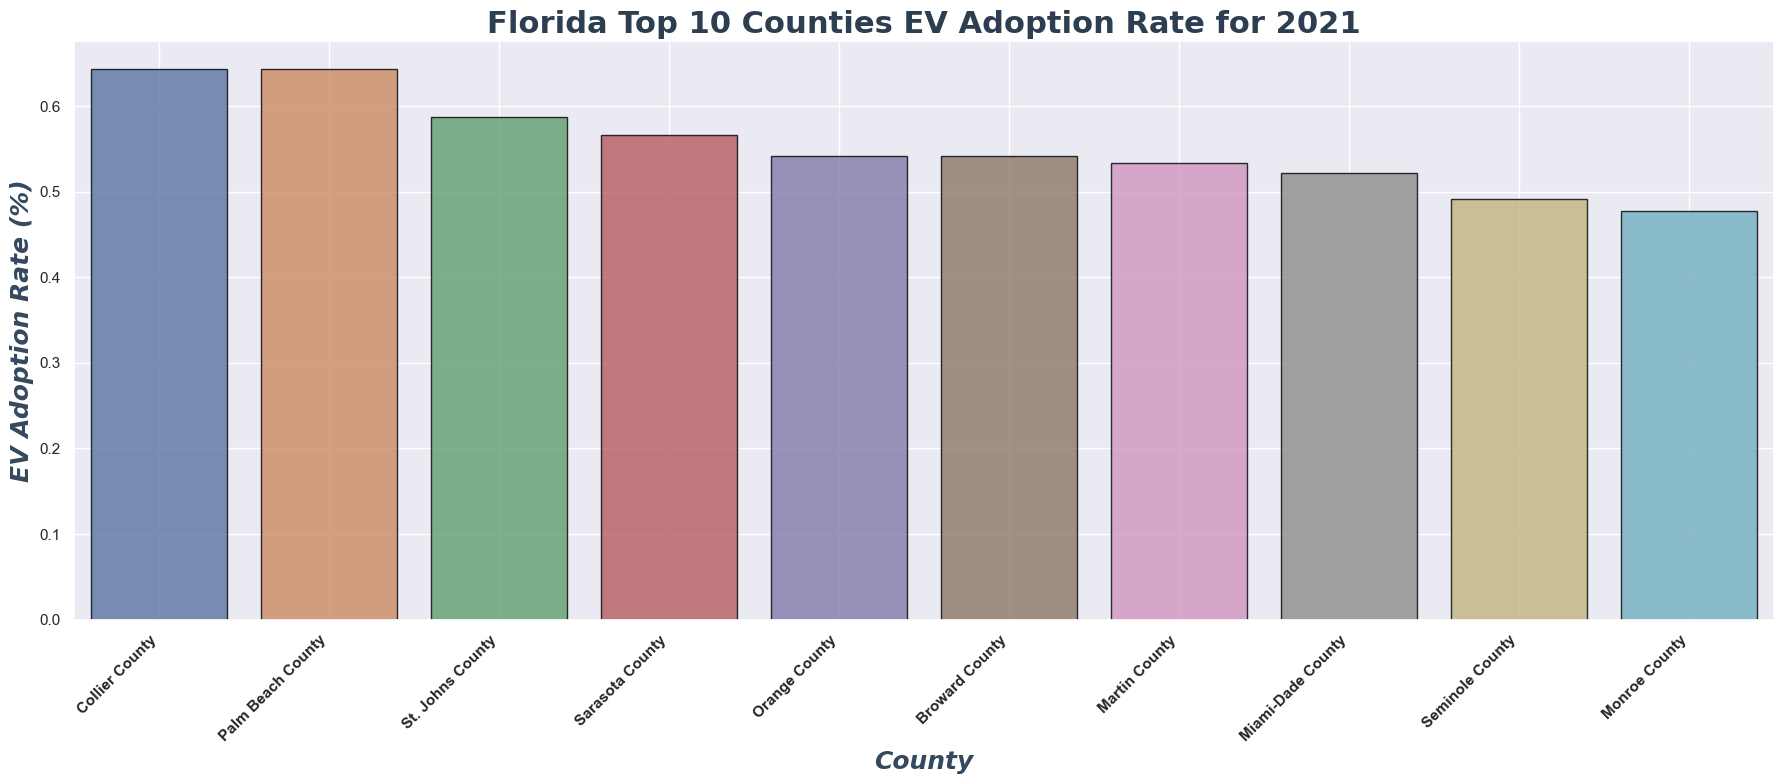

In [23]:
# Plot the EV vehicle adoption rate for a specific year for the top 10 counties in Florida
year_to_plot = 2021
year_df = fl_top_10_df[fl_top_10_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df, 
    ax,
    x='county', 
    y='ev_adoption_rate', 
    hue='county',
    title=f'Florida Top 10 Counties EV Adoption Rate for {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

file_name = "fl_top_10_counties_2021.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

display(year_df.sort_values(by='ev_adoption_rate', ascending=False))

# Show the plot
plt.show()

# California Visualizations: Adoption Rate

In [24]:
# Inspection for anomalies behavior in the data using interactive hvplot
ca_df.hvplot.line(
    x='year',
    y='ev_adoption_rate',
    by='county',
    title='California EV Adoption Rate Over Time by County',
    xlabel='Year',
    ylabel='EV Adoption Rate (%)',
    legend='top',
    fontscale=1.2,
    width=750,
    height=500,
)

:NdOverlay   [county]
   :Curve   [year]   (ev_adoption_rate)

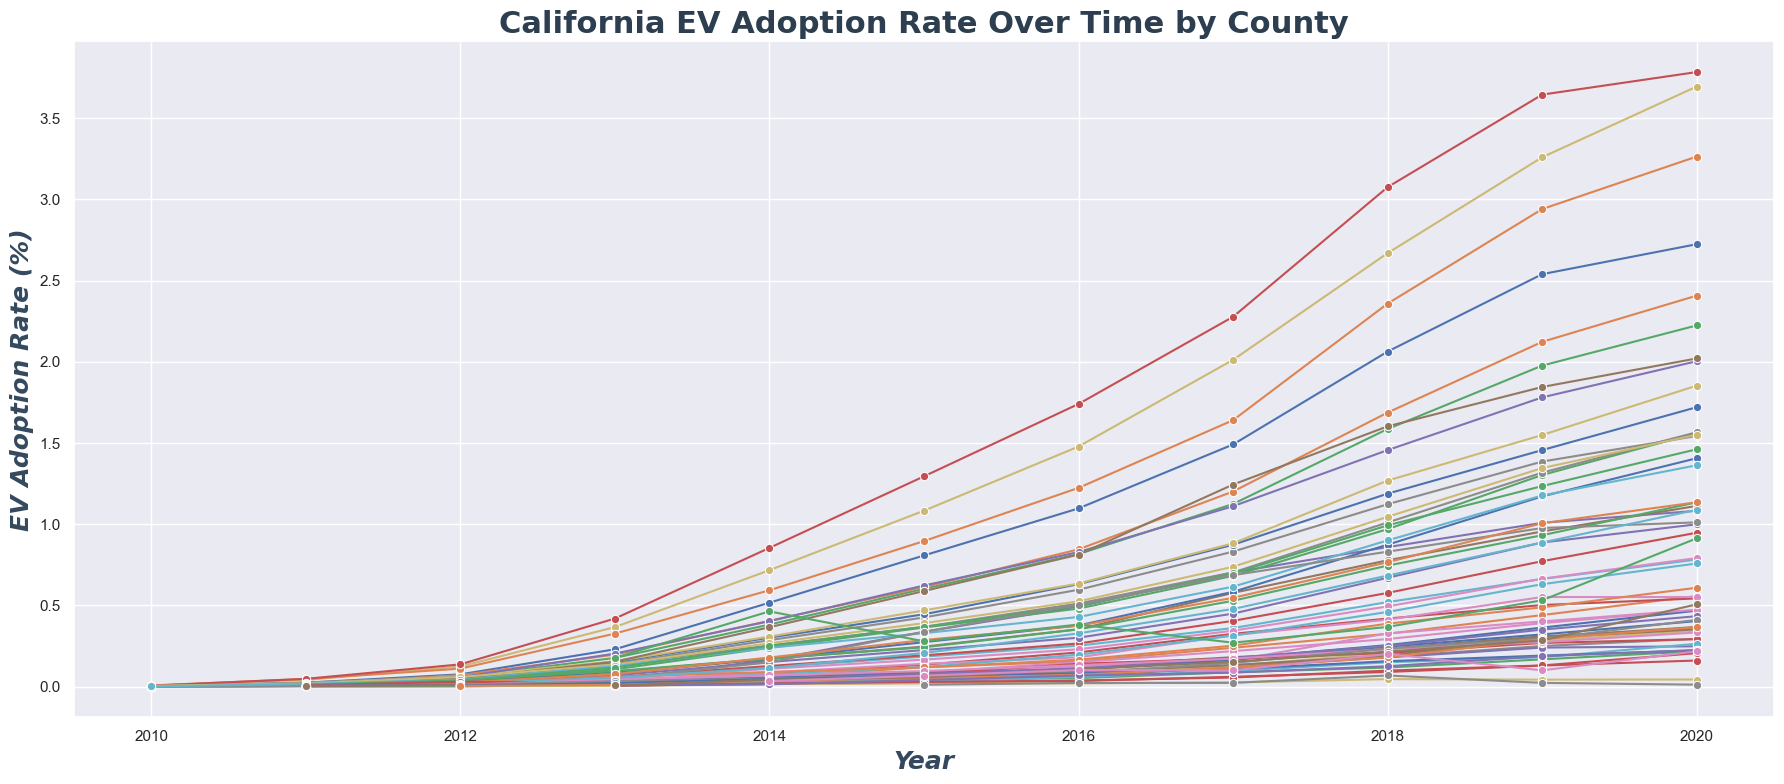

In [25]:
# Plot the EV vehicle adoption rate over time by county in California

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    ca_df,
    ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="county",
    title="California EV Adoption Rate Over Time by County",
    x_label="Year",
    y_label="EV Adoption Rate (%)",
    leg_title="County",
)

# Hide the legend
ax.legend().set_visible(False)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "ca_ev_adoption_rate_by_county.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

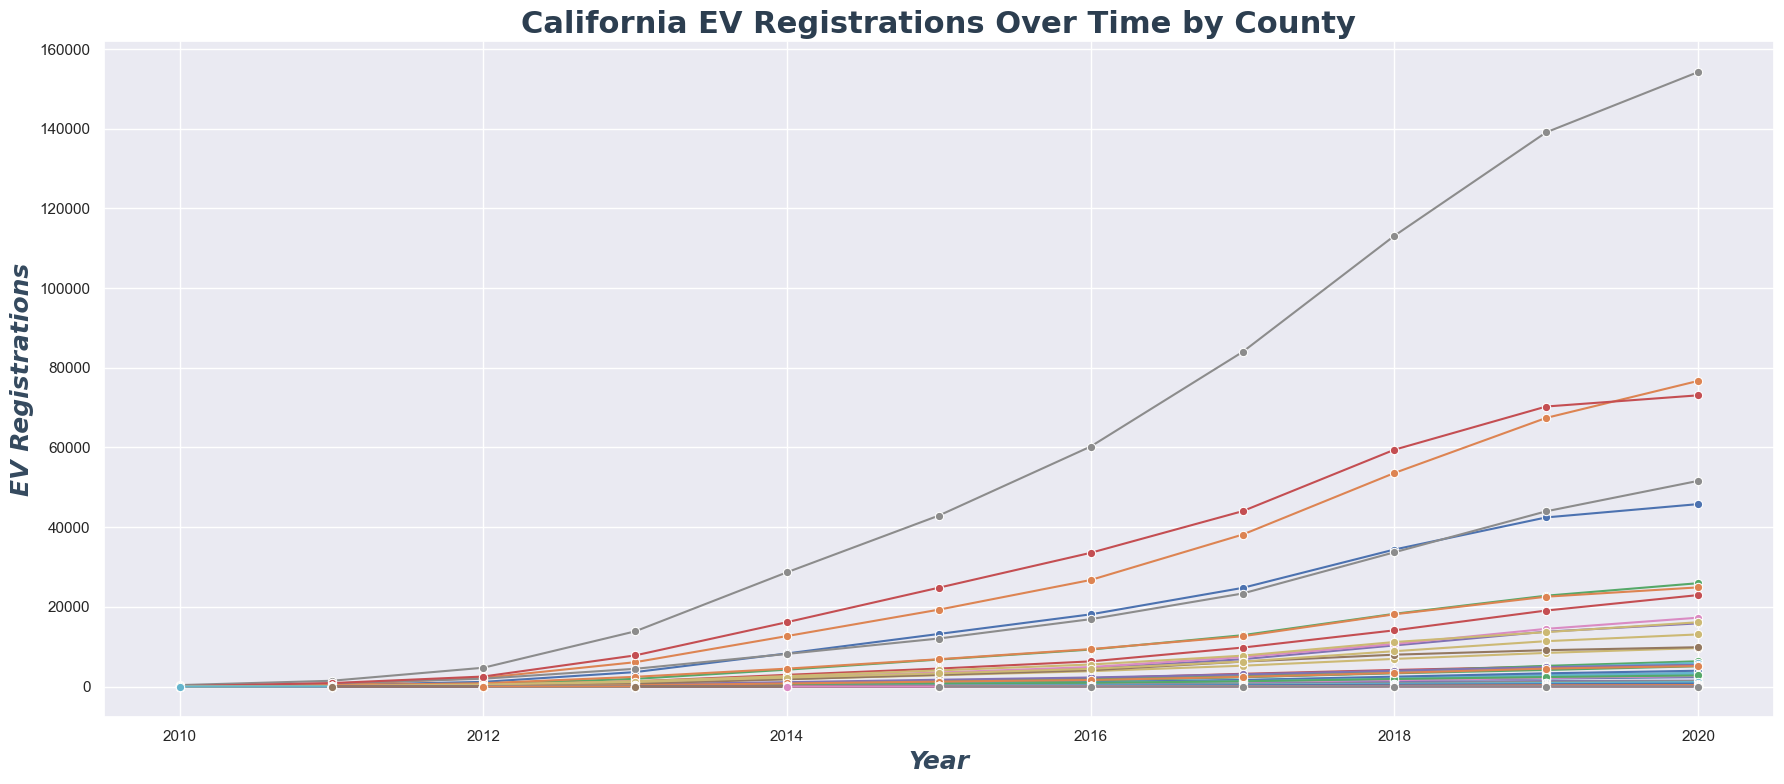

In [30]:
# Plot the EV vehicle registrations over time by county in California

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    ca_df,
    ax, 
    x="year", 
    y="ev_registrations", 
    hue="county",
    title="California EV Registrations Over Time by County",
    x_label="Year",
    y_label="EV Registrations",
    leg_title="County",
)

# Hide the legend
ax.legend().set_visible(False)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "ca_ev_registrations_by_county.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

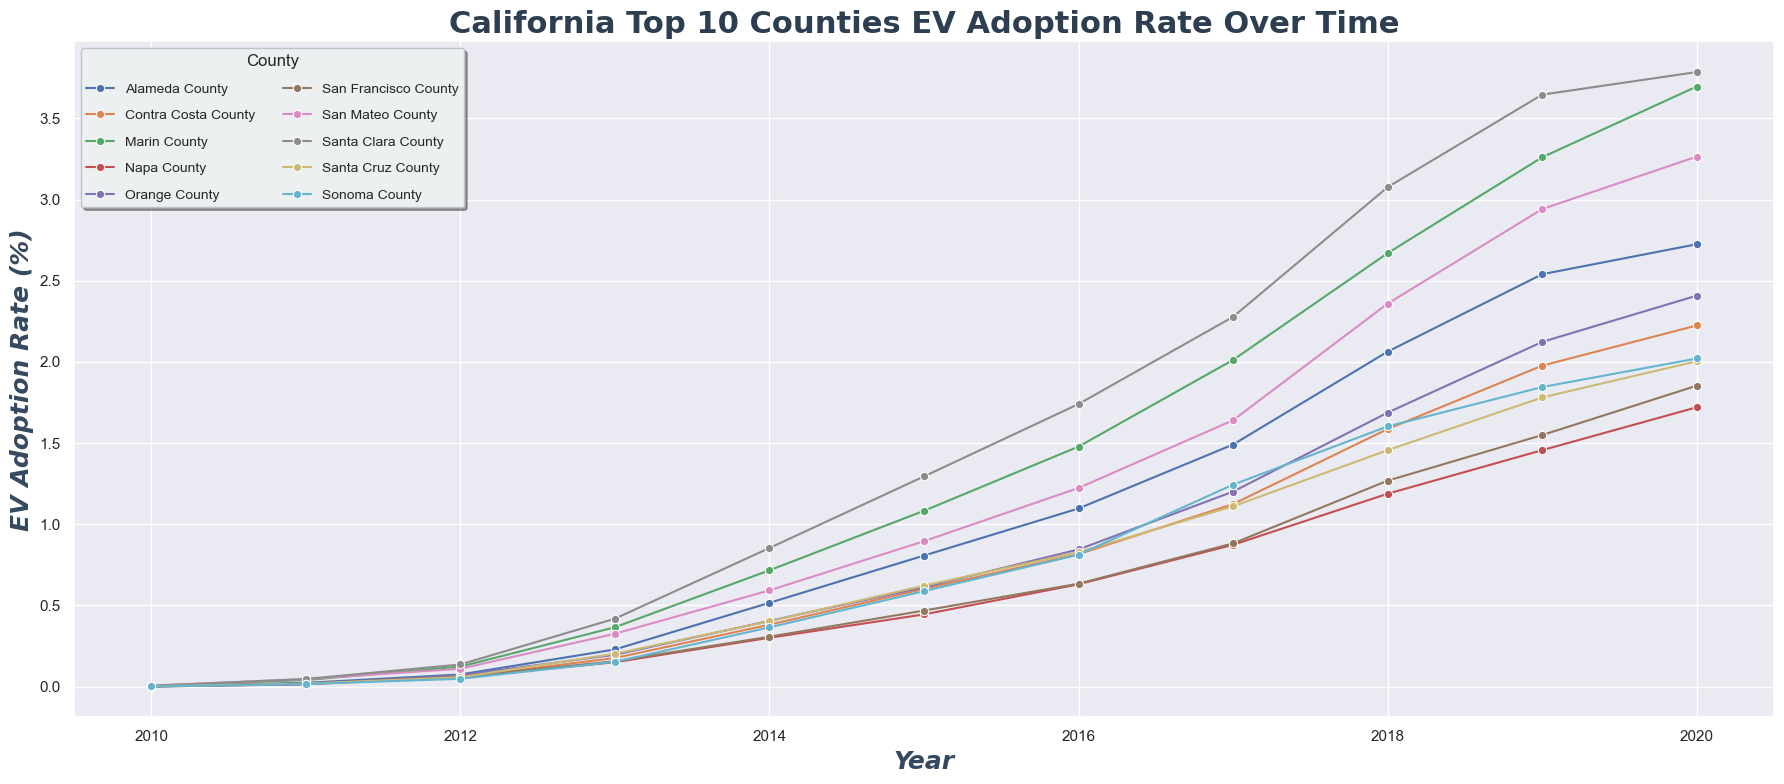

In [26]:
# Plot the EV vehicle adoption rate over time for the top 10 counties in California

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df=ca_top_10_df,
    ax=ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="county",
    title="California Top 10 Counties EV Adoption Rate Over Time",
    x_label="Year",
    y_label="EV Adoption Rate (%)",
    leg_title="County",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

file_name = "ca_top_10_counties_ev_adoption_rate.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

In [27]:
# Filter the data for the year to plot for California
year_to_plot = 2020
year_df = ca_df[ca_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Inspect for anomalies behavior in the data using interactive hvplot
year_df.hvplot.bar(
    x='county',
    y='ev_adoption_rate',
    title = f'EV Adoption Rate by County in California for {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)',
    rot=45,
    width=1500,
    height=650,
)

:Bars   [county]   (ev_adoption_rate)

year state                county  \
573  2020    CA    Santa Clara County   
551  2020    CA          Marin County   
571  2020    CA      San Mateo County   
531  2020    CA        Alameda County   
560  2020    CA         Orange County   
537  2020    CA   Contra Costa County   
579  2020    CA         Sonoma County   
574  2020    CA     Santa Cruz County   
568  2020    CA  San Francisco County   
558  2020    CA           Napa County   

                                             zip_codes  population  \
573  [94022, 94023, 94024, 94035, 94039, 94040, 940...     1931168   
551  [94901, 94903, 94904, 94912, 94913, 94914, 949...      261306   
571  [94002, 94005, 94010, 94011, 94013, 94014, 940...      762479   
531  [94501, 94502, 94536, 94537, 94538, 94539, 945...     1680466   
560  [90620, 90621, 90622, 90623, 90624, 90630, 906...     3185734   
537  [94505, 94506, 94507, 94509, 94511, 94513, 945...     1166069   
579  [94922, 94923, 94926, 94927, 94928, 94931, 949...      488282   
574  [95001, 95003, 95005, 95006, 95007, 95010, 950...      270474   
568  [94101, 94102, 94103, 94104, 94105, 94106, 941...      870518   
558  [94503, 94508, 94515, 94558, 94559, 94562, 945...      137459   

     ev_registrations  cumulative_ev_stations  median_income  \
573             73092                     413         130890   
551              9657                      80         121671   
571             24890                     208         128091   
531             45785                     244         104888   
560             76706                     499          94441   
537             25938                     112         103997   
579              9868                     122          56944   
574              5420                      37          89986   
568             16134                     139         119136   
558              2365                     117          92219   

     ev_adoption_rate  ev_growth_rate  
573          3.784860        3.813696  
551          3.695667       13.360363  
571          3.264352       10.999124  
531          2.724542        7.267340  
560          2.407797     9940.030925  
537          2.224397       12.524641  
579          2.020963        9.531292  
574          2.003889       12.513081  
568          1.853379       19.616709  
558          1.720513       18.140751

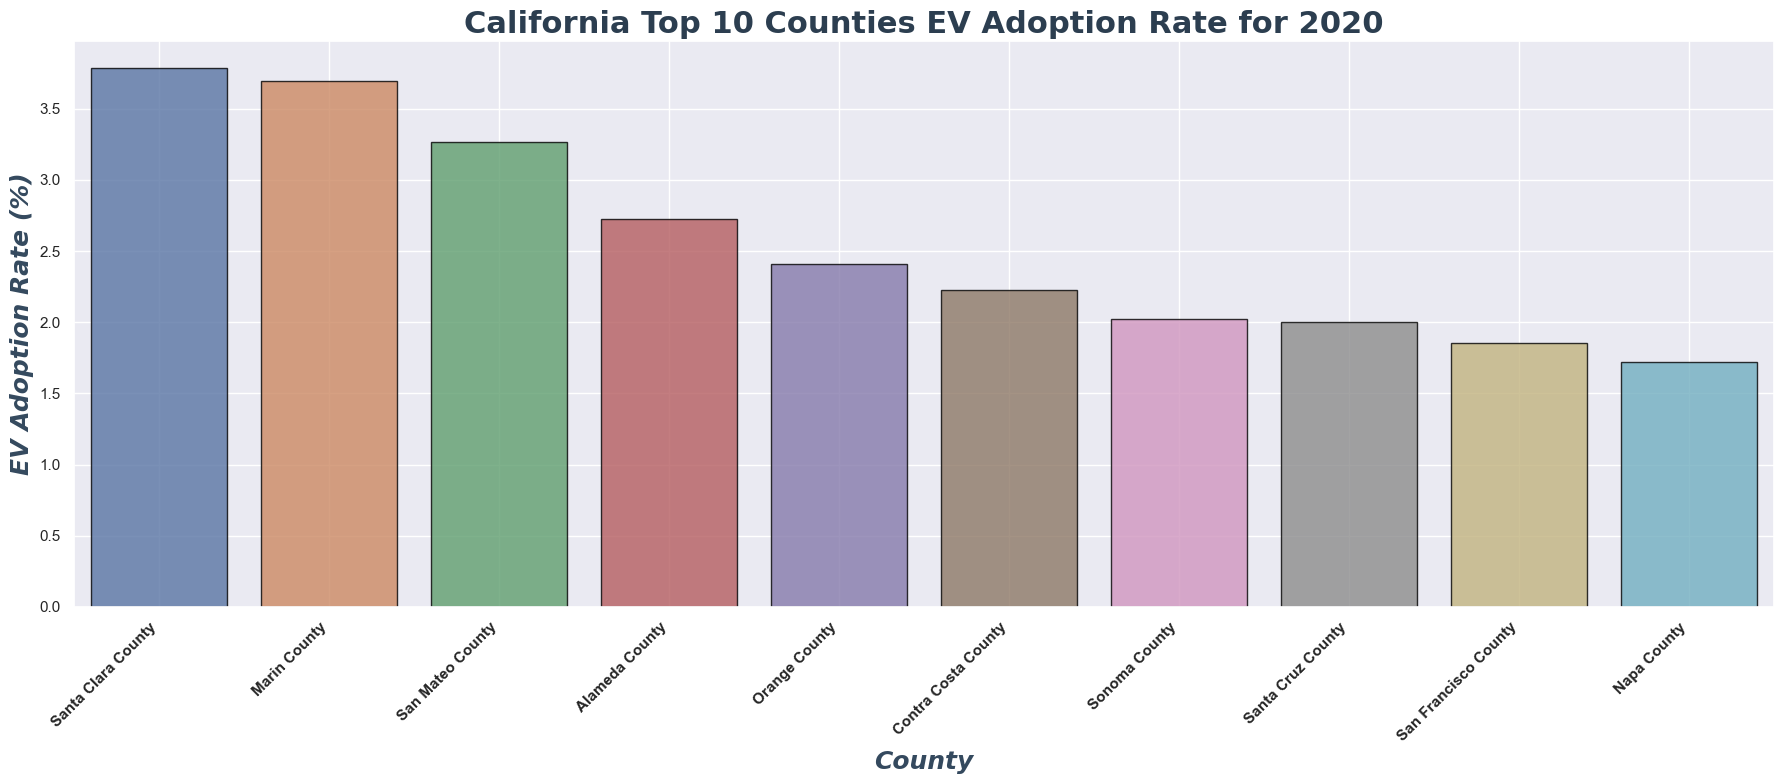

In [28]:
# Filter the data for the year to plot for California
year_to_plot = 2020
year_df = ca_top_10_df[ca_top_10_df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df, 
    ax,
    x='county', 
    y='ev_adoption_rate', 
    hue='county',
    title=f'California Top 10 Counties EV Adoption Rate for {year_to_plot}',
    xlabel='County',
    ylabel='EV Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

display(year_df.sort_values(by='ev_adoption_rate', ascending=False))

file_name = "ca_top_10_counties_2020.png"
file_path = Path(f"../../../../../reports/figures/adoption_rate_by_county/{file_name}")
plt.savefig(file_path, bbox_inches='tight')
# Show the plot
plt.show()